In [1]:
import cv2
import os
import numpy as np
import easyocr
import matplotlib.pyplot as plt

In [2]:
from pdf2image import convert_from_path

# convert PDF to image then to array ready for opencv
pages = convert_from_path('titulo_illak.pdf')
img = np.array(pages[0])

# opencv code to view image
#img = cv2.resize(img, None, fx=1.2, fy=1.2)
#cv2.imshow("img", img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

In [16]:
type(img)

numpy.ndarray

In [3]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [4]:
text_reader = easyocr.Reader(['es'])

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


In [26]:
results = text_reader.readtext(img)

In [27]:
len(results)

33

In [23]:
for (bbox, text, prob) in results:
    print(text)

Universidad Nacional de Córdoba
República Argencina
El Vicerrector de la Universidad y la Decana de la
Facultad de Matemática, Astronomía, Física y Computación
Por cuanto:
ILLAK YURI ZAPATA SILVA
de nacionalidad argentina, documento nacional de identidad 35018128,
ha terminado el 03 de Diciembre de 2018,los estudios correspondientes a la carrera de
de
Licenciatura cn Cicncias de la Computación
Conforme con las nommas legales vigentes le confieren el presente ttulo de
Licenciado en Ciencias de la Computación
Ciudad de Córdoba, 27 de Mayo de 2019
Lnd
~ld
Xc{c
K7(e
Robeno
noquc Tcrunol
sapsasts
Rcgstado 1 íobu /53
Dl Lbo & [oJn M
33
UNC
Uzicraaa
(nrueni
àd =(oruea
e
ce Corcas
059543
Scanned by CamScanner
grado


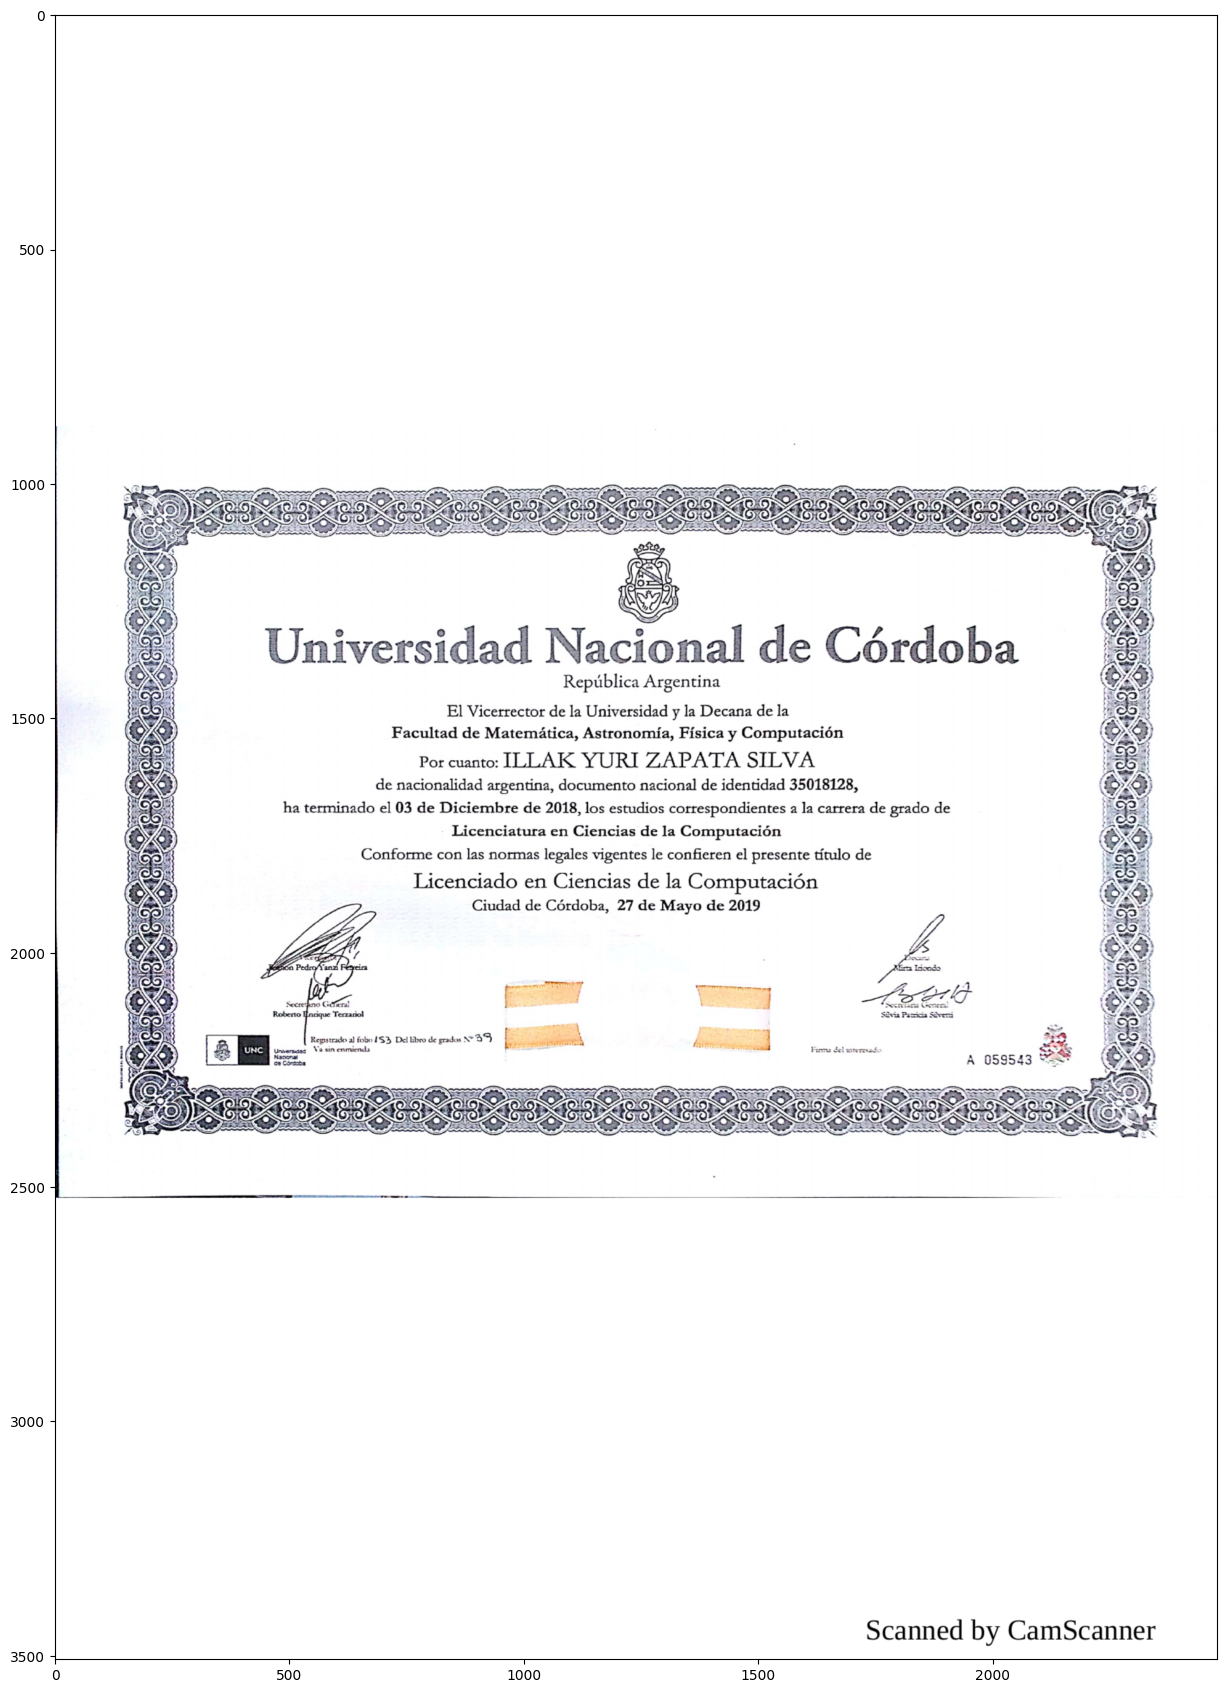

In [18]:
plt.rcParams['figure.figsize'] = [15, 30]

plt.imshow(img)

plt.show()

In [4]:
import keras_ocr

2023-10-14 00:52:28.193139: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-14 00:52:28.640578: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-14 00:52:28.640673: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-14 00:52:28.643698: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-14 00:52:28.748787: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: A

In [5]:
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /home/jovyan/.keras-ocr/craft_mlt_25k.h5


2023-10-14 00:53:18.091739: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 18874368 exceeds 10% of free system memory.
2023-10-14 00:53:18.105852: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 18874368 exceeds 10% of free system memory.
2023-10-14 00:53:18.112384: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 18874368 exceeds 10% of free system memory.


Instructions for updating:
Use `tf.image.resize(...method=ResizeMethod.BILINEAR...)` instead.


2023-10-14 00:53:19.042824: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 18874368 exceeds 10% of free system memory.


Looking for /home/jovyan/.keras-ocr/crnn_kurapan.h5


In [8]:
images = [keras_ocr.tools.read(img)]

In [9]:
prediction = pipeline.recognize(images)

4/4 [==============================] - 12s 2s/step


In [59]:
?pipeline.recognize

Signature: pipeline.recognize(images, detection_kwargs=None, recognition_kwargs=None)
Docstring:
Run the pipeline on one or multiples images.

Args:
    images: The images to parse (can be a list of actual images or a list of filepaths)
    detection_kwargs: Arguments to pass to the detector call
    recognition_kwargs: Arguments to pass to the recognizer call

Returns:
    A list of lists of (text, box) tuples.
File:      /opt/conda/lib/python3.10/site-packages/keras_ocr/pipeline.py
Type:      method

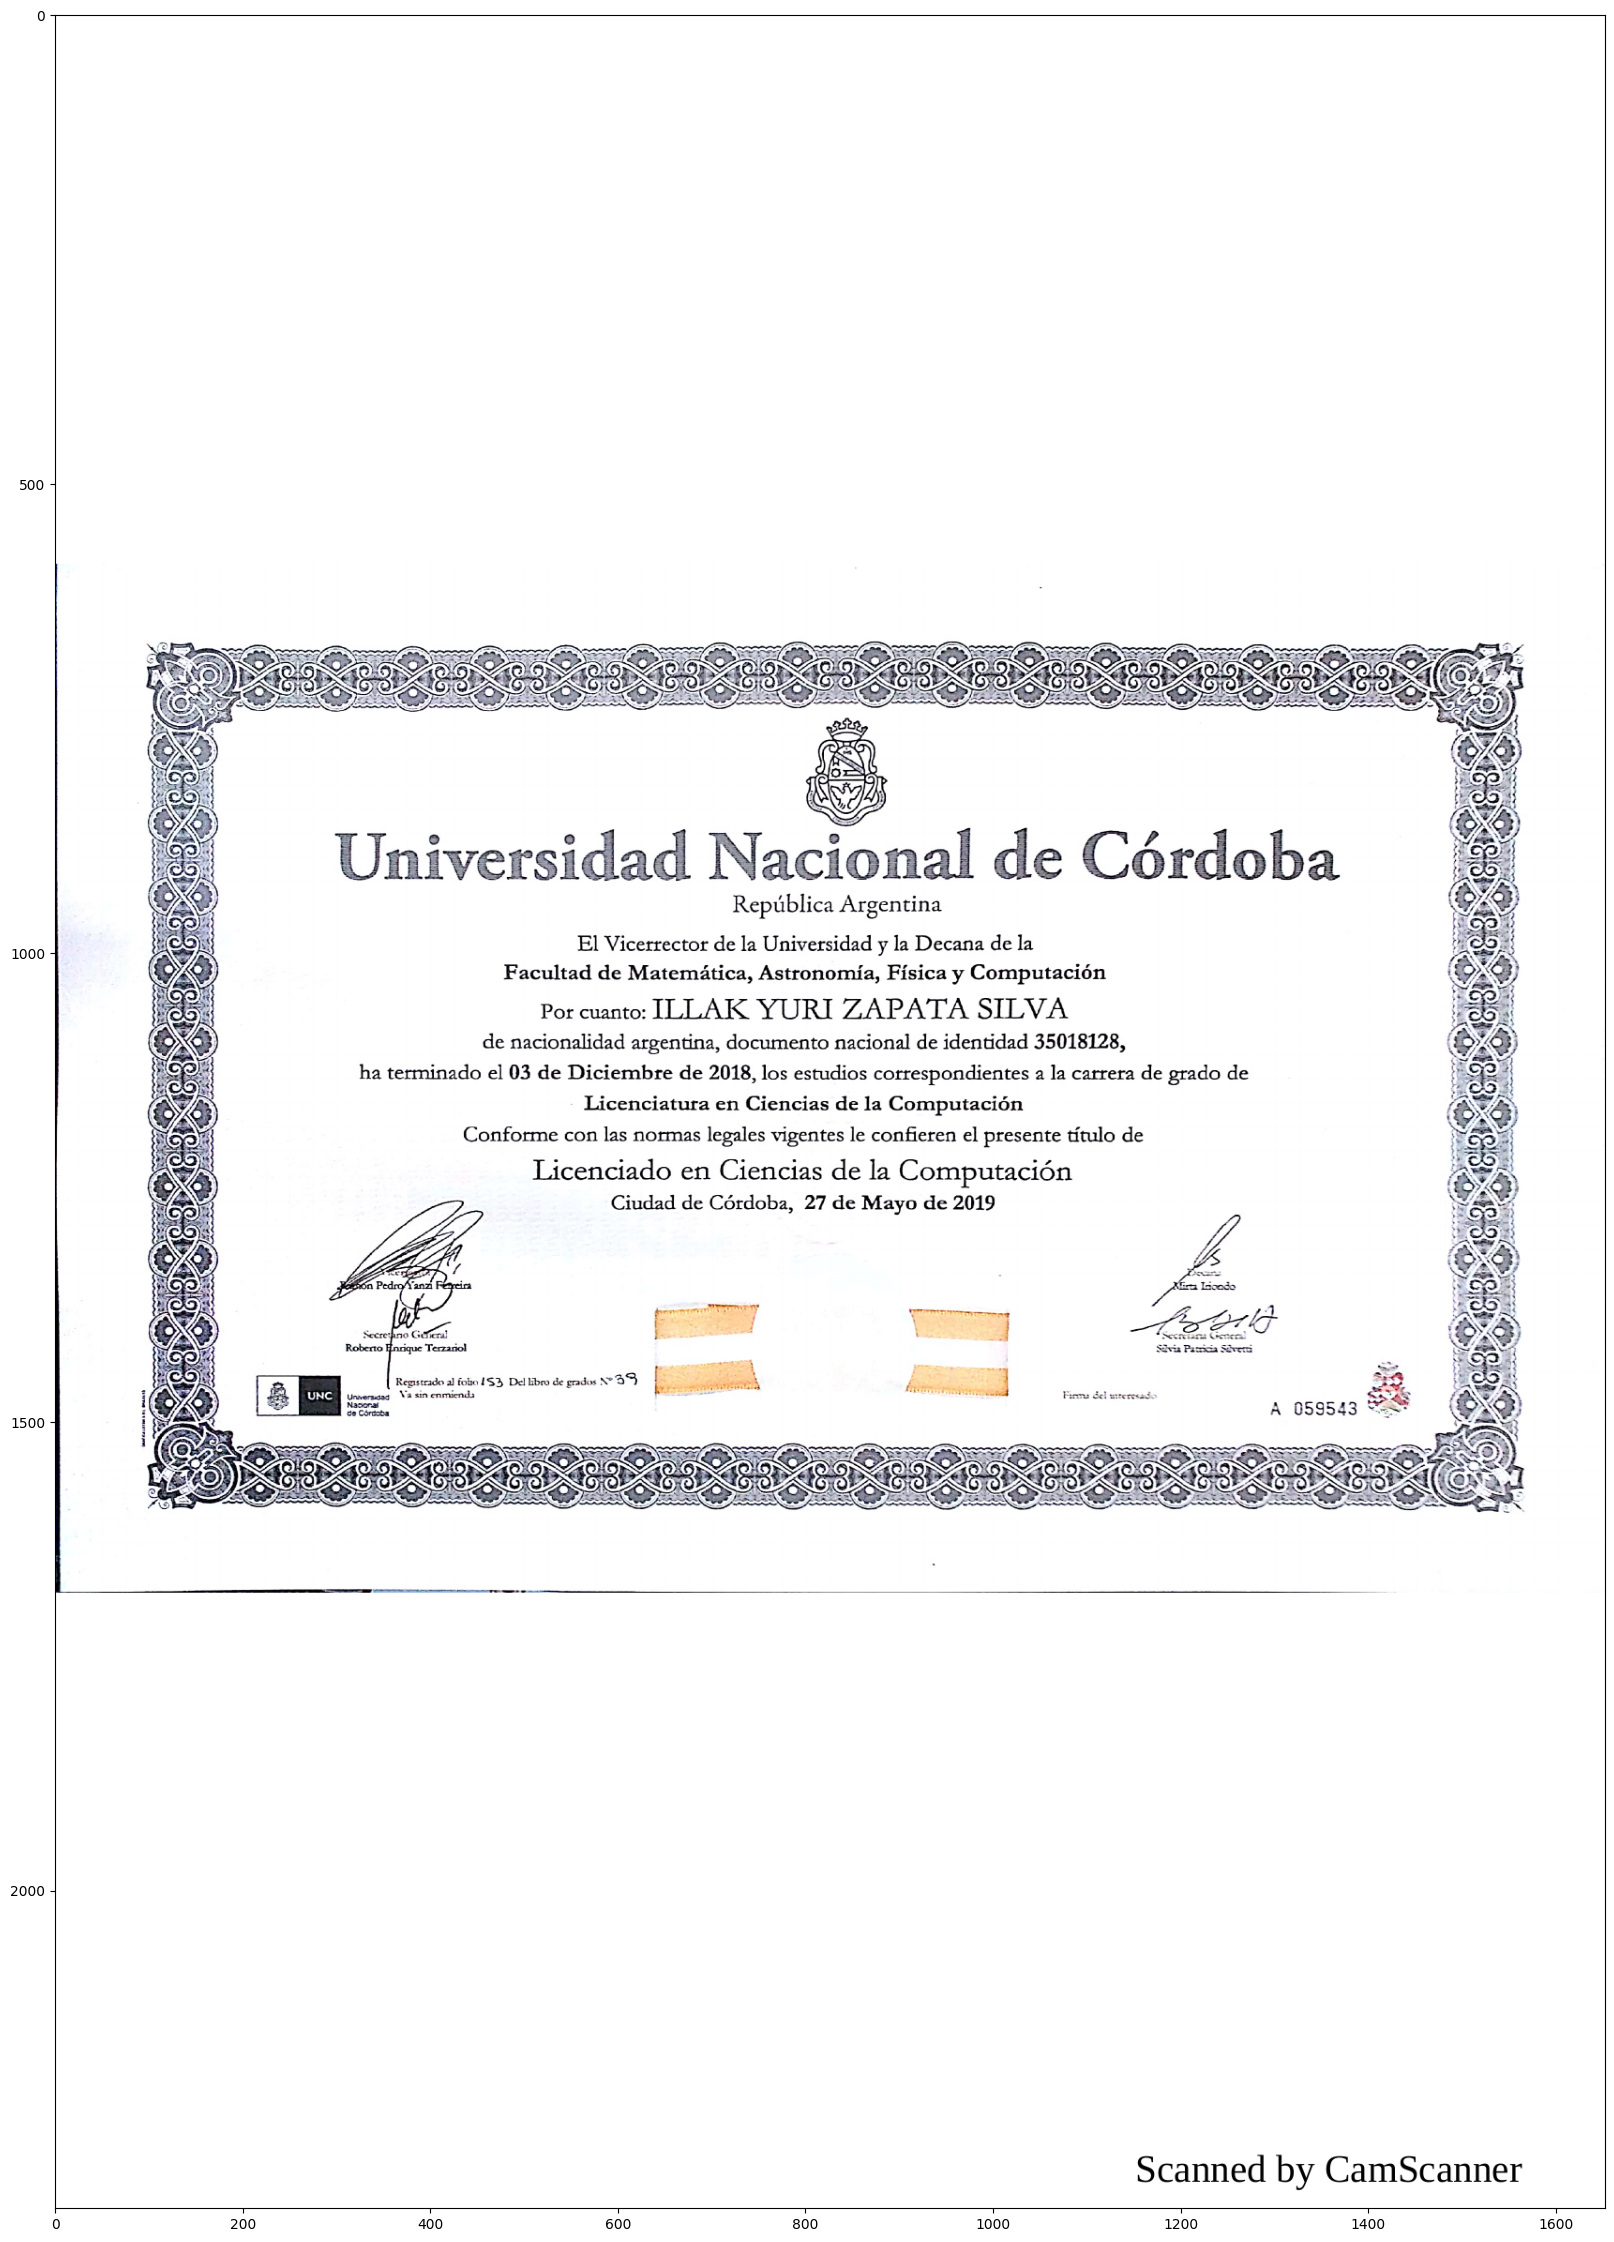

In [56]:
plt.rcParams['figure.figsize'] = [20, 35]

plt.imshow(images[0])

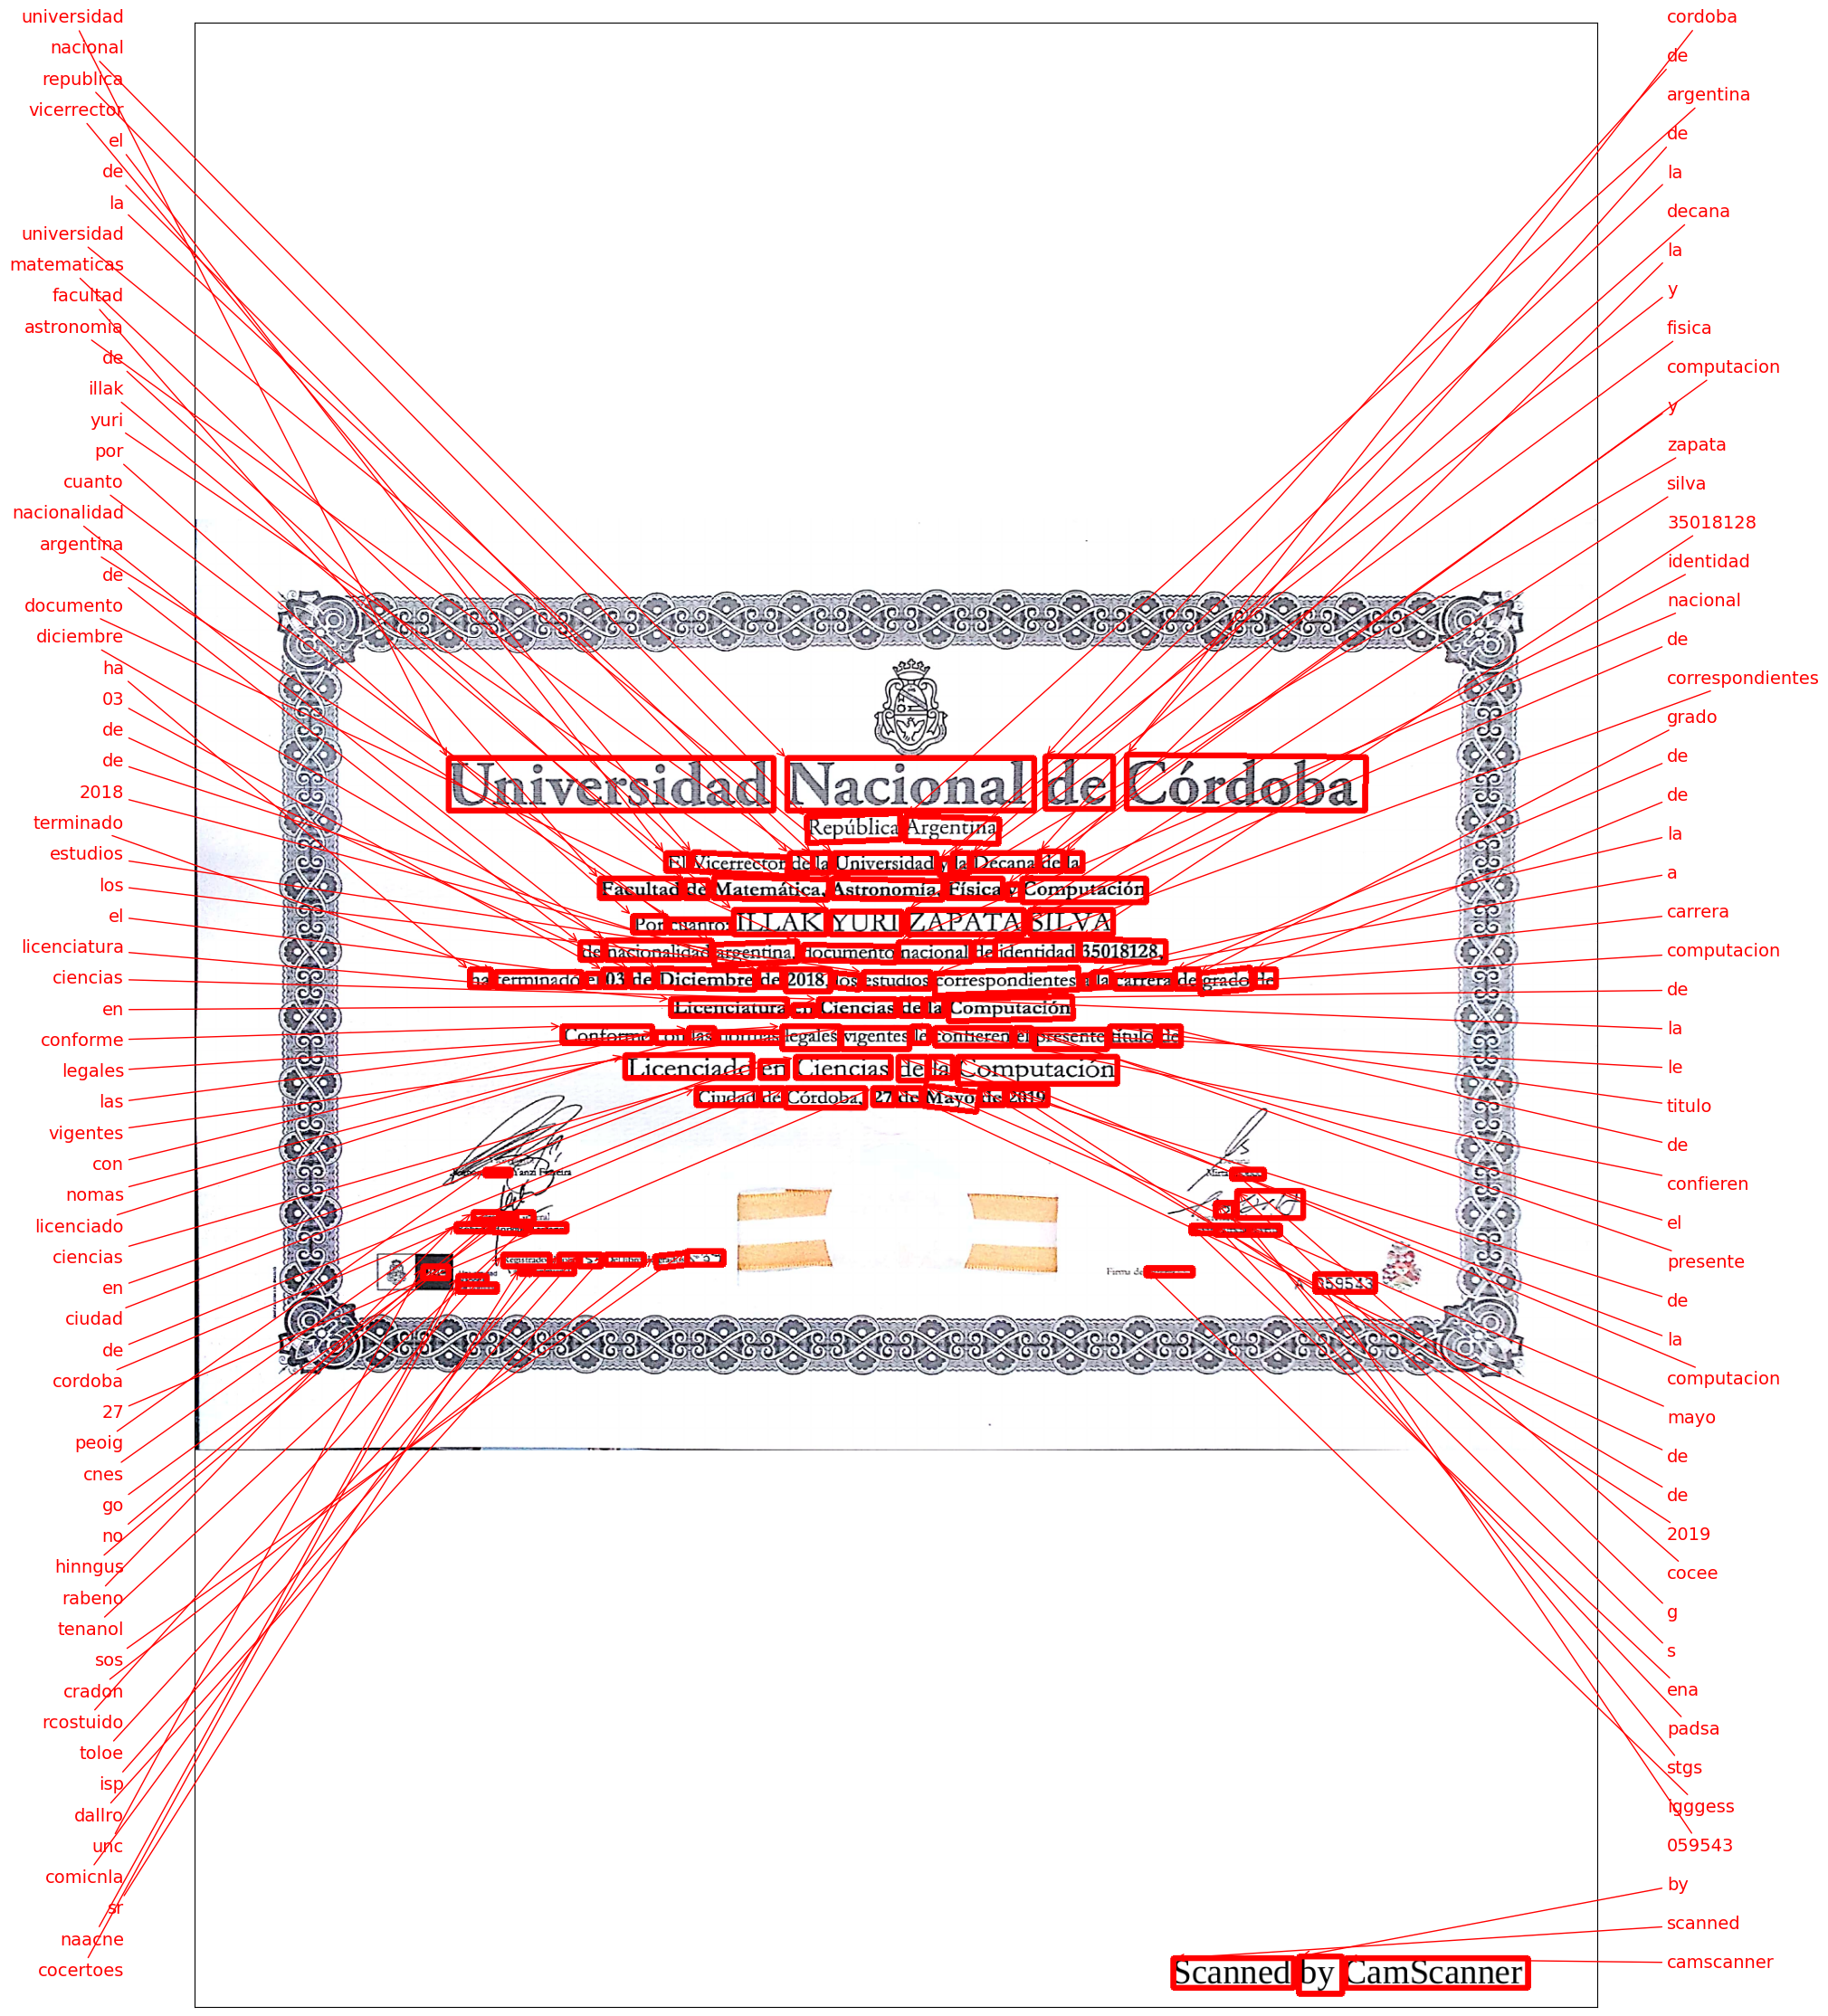

In [57]:
output = keras_ocr.tools.drawAnnotations(image=images[0], predictions=prediction[0])

In [58]:
# Set the output path
output_path = 'annotated_image.jpg'

# Save the output Axes as an image
output.figure.savefig(output_path, bbox_inches='tight', pad_inches=0)

# Close the figure to release resources
plt.close(output.figure)